## Exercises

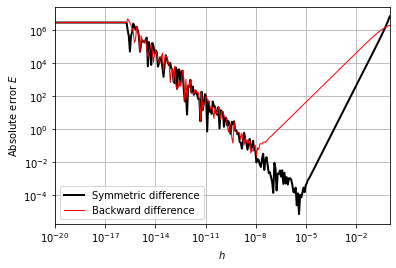

In [2]:
#Exercise 1

import numpy as np
import matplotlib.pyplot as plt

h = np.logspace(-20, 0, 300)
x = 4
f = lambda x: 4*x**4 + x + 6*np.exp(3*x)
actual = 16*x**3 + 1 + 18*np.exp(3*x)

fx = f(x)
fxp = f(x+h)
fxm = f(x-h)

est2 = (fxp - fxm)/(2*h)
est3 = (fx - fxm)/h

err1 = abs(actual-est3)
err2 = abs(actual-est2)

plt.loglog(h, err2, 'k', lw=2)
plt.loglog(h, err1, 'r', lw=1)
plt.legend(['Symmetric difference', 'Backward difference'])
plt.xlabel(r'$h$')
plt.ylabel(r'Absolute error $E$')
plt.xlim([1e-20, 1])
plt.grid('on')
plt.show()

The qualitative behaviour if E(h) certainly does not change by these modifications- the graphs are identical. 

Overall straightforward and simple exercise to start of with and really interesting!

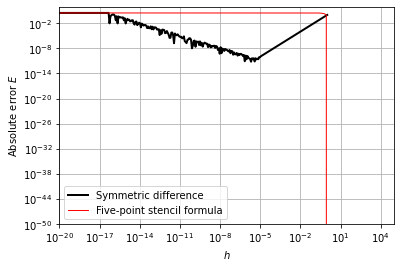

In [3]:
#Exercise 2

#Five-point stencil formula: f'(x) = 1/12h (-f(x+2h) + 8f(x+h) - 8f(x -h) +f(x-2h))

import numpy as np
import matplotlib.pyplot as plt

h = np.logspace(-20, 0, 300)
x = 1 
f = lambda x: x**3   
actual = 3*x**2

fx = f(x)
fxp = f(x+h)
fxm = f(x-h)
fxr = 8*f(x+h)
fxs = 8*f(x-h)
fxt = f(x+2*h)
fxu = f(x-2*h)

est1 = (-fxt + fxr - fxs + fxu)/12*h
est2 = (fxp-fxm)/(2*h)

err1 = abs(actual-est1)
err2 = abs(actual-est2)

plt.loglog(h,err2, 'k', lw=2) 
plt.loglog(h,err1, 'r', lw=1)
plt.legend(['Symmetric difference', 
            'Five-point stencil formula'])
plt.xlabel(r'$h$')
plt.ylabel(r'Absolute error $E$')
plt.xlim([1e-20, 100000])
plt.ylim([1e-50,100])
plt.grid('on')
plt.show()

Compared with figure 2.2 (as you can see near the beginning of this notebook), the graph of the FPSF is a contant vertical line at the same absolute error the *forward difference* starts at. Then it just shoots down to infinity between $h=10^-2$ and $h=10^1$. 

In *'big O'* notation, the FPSF would be approximated by $**O(h^**

If we are using the gradient method demonstated earlier in the chaper, the gradient here looks like negative infinity but I am unsure where to go from here. 


Overall, another interesting and cool method to learn about and definately more exotic than the three we were introduced to. One thing is I'm unsure if I plotted this correctly as I am getting an odd gradient for me to calculate the value of k to appromiate E(h) via big O notation. 

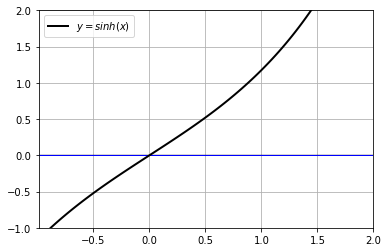

In [4]:
#Exercise 3

#(a) By hand on paper- got the required answers

#(b)

import numpy as np
import matplotlib.pyplot as plt
import scipy

#sinh(x)
def nth_term(x,n):
        return x**(2*n+1)/scipy.math.factorial(2*n+1)
    
S = 0
n_max = 40
x = np.linspace(-0.99, 2, 100)

for n in np.arange(0,n_max+1):
    S =+ nth_term(x,n)
    b=n/n_max
    if (n>=5):
        plt.plot(x,S,label='_nolegend_',
        color = (0,0,b), lw=1)
    
plt.plot(x, np.sinh(x),lw=2,color='k')
plt.legend([r'$y=sinh(x)$'],loc = 'upper left')
plt.xlim([-0.99, 2])
plt.ylim([-1,2])
plt.grid('on')
plt.show()

=> *R = $\infty$*

**COMMENT ON CODE** 

There is an issue with the following line:`S += nth_term(x,n)`. When I write the + and = sign in this order, the code works and the lines allign (I think this is supposd to happen for it to be correct). However if I use this order for the sin(x) and sinh(x) exercises I get the following error message:

TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

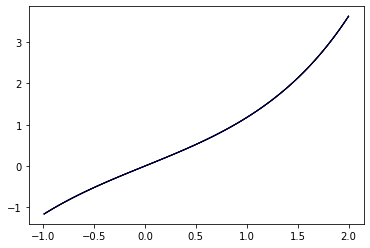

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

#sinh(x)
def nth_term(x,n):
        return x**(2*n+1)/scipy.math.factorial(2*n+1)
    
S = 0
n_max = 40
x = np.linspace(-0.99, 2, 100)

for n in np.arange(0,n_max+1):
    S += nth_term(x,n)
    b=n/n_max
    if (n>=5):
        plt.plot(x,S,label='_nolegend_',
        color = (0,0,b), lw=1)
    
plt.plot(x, np.sinh(x),lw=2,color='k')
plt.legend([r'$y=sinh(x)$'],loc = 'upper left')
plt.xlim([-0.99, 2])
plt.ylim([-1,2])
plt.grid('on')
plt.show()

This cell only works if I swap the order of the + and =. Is there a way to explain this or make it clearer? This may confuse a student new to advanced coding and Python.

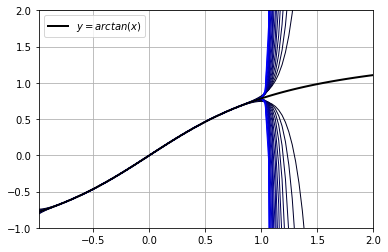

In [5]:
#arctan(x)

def nth_term(x,n):
        return (-1)**n*x**(2*n+1)/(2*n+1)
    
S = 0
n_max = 40
x = np.linspace(-0.99, 2, 100)

for n in np.arange(0,n_max+1):
    S += nth_term(x,n)
    b=n/n_max
    if (n>=5):
        plt.plot(x,S,label='_nolegend_',
        color = (0,0,b), lw=1)
    
plt.plot(x, np.arctan(x),lw=2,color='k')
plt.legend([r'$y=arctan(x)$'],loc = 'upper left')
plt.xlim([-0.99, 2])
plt.ylim([-1,2])
plt.grid('on')
plt.show()

=> $R = 1$

In [10]:
#sqrt(1+x)

#creating individual terms of a taylor series.
#define f(x) = sqrt(1+x)

import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from scipy.misc import derivative

f = lambda x: (1+x)**1/2

S = 0
n_max = 40
x = np.linspace(0, 6, 100)

def nth_term(x,n):
    return derivative(f, 0, 1e-6, n, 3)*x**n/(scipy.math.factorial(n))

for n in np.arange(0,n_max+1):
    S =+ nth_term(x,n)
    b = n/n_max
    if (n>=5):
        plt.plot(x,S,label='_nolegend_',color = (0,0,b), lw = 1)
        
plt.plot(x, np.sqrt(1+x),lw=2,color = 'k')
plt.legend([r'$y=sqrt(1+x)$'], loc='lower left')
plt.xlim([0,6])
plt.ylim([-2,2])
plt.grid('on')
plt.show()

TypeError: Value after * must be an iterable, not int

=> $R = 0$ **or** $R = 1$ 

I was unable to calculate a power series for this given function (and I am not sure if it is possible) so I attempted to use the *symmetric-difference formula* from section 2.1. You were made aware by JX about the issues with the code when computing the third derivative and it seems it has come up here again. Perhaps offer a hint for the reader to help them get on because for new coders like myself it is quite diffuclt to get started and may struggle with researching code to help the reader continue. Nevertheless, this is a stimulating activity and pushes the reader to think outside the box and combine different techniques discussed in this chapter. A little help wouldn;t hurt anyone though!

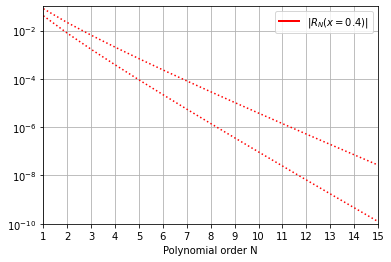

In [15]:
#c

#sinh(x)

import numpy as np
import matplotlib.pyplot as plt

def Nth_term(x,N):
    return x**(2*N+1)/scipy.math.factorial(2*N+1)
    
x = 0.4
N_max = 15 
Nlist = np.arange(1,N_max+1)
P = 0
PNlist = []
lowlist=[]
hilist=[]

for N in Nlist:
    P = P + Nth_term(x,N)
    PNlist.append(P)
    Np= N+1
    low = (x/(1+x))**Np/Np
    lowlist.append(low)    
    hi = x**Np/Np
    hilist.append(hi)   
    
RN = abs(PNlist-np.log(1+x))
        
plt.semilogy(Nlist, RN, lw=2, 
             color = 'r')
plt.semilogy(Nlist,lowlist,'r:',
             Nlist,hilist, 'r:')
plt.legend([r'$|R_N(x=0.4)|$']) 
plt.xticks(Nlist) 
plt.xlim([1,N_max])
plt.xlabel('Polynomial order N')
plt.ylim([1e-10,0.1])
plt.grid('on')
plt.show()

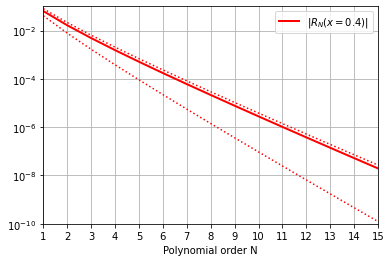

In [1]:
#Exercise 4

#f(x) = ln(1+x)


import numpy as np
import matplotlib.pyplot as plt

def Nth_term(x,N):
    return -(-1)**N*x**N/N
    
x = 0.4
N_max = 15 
Nlist = np.arange(1,N_max+1)
P = 0
PNlist = []
lowlist=[]
hilist=[]

for N in Nlist:
    P = P + Nth_term(x,N)
    PNlist.append(P)
    Np= N+1
    low = (x/(1+x))**Np/Np
    lowlist.append(low)    
    hi = x**Np/Np
    hilist.append(hi)   
    
RN = abs(PNlist-np.log(1+x))
        
plt.semilogy(Nlist, RN, lw=2, 
             color = 'r')
plt.semilogy(Nlist,lowlist,'r:',
             Nlist,hilist, 'r:')
plt.legend([r'$|R_N(x=0.4)|$']) 
plt.xticks(Nlist) 
plt.xlim([1,N_max])
plt.xlabel('Polynomial order N')
plt.ylim([1e-10,0.1])
plt.grid('on')
plt.show()

In [9]:
#root finding code UNSURE

[EX 4]

This again is a very interesting and intellectually stimulating exercise. However, trying to research this code to find the root of the line and then solve for the constant $\xi$. Perhaps once again a hint or perhaps an extra appendix for common python codes for simple mathematical procedures such as finding roots and gradients of graphs for all cases. 

In [ ]:
#Exercise 5

#[THE BLANCMANGE FUNCTION] f_0(x) = min{abs(x-k),an integer k},  f_m(x) = 1/2^mf_0(2^mx)

import numpy as np
import matplotlib.pyplot as plt

m = 
